In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
data=pd.read_csv(r"E:\data trained projects\Evaluation Projects\assignment 1\avocado.csv")
data

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  27-12-2015          1.33      64236.62  1036.74   54454.85   
1               1  20-12-2015          1.35      54876.98   674.28   44638.81   
2               2  13-12-2015          0.93     118220.22   794.70  109149.67   
3               3  06-12-2015          1.08      78992.15  1132.00   71976.41   
4               4  29-11-2015          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  04-02-2018          1.63      17074.83  2046.96    1529.20   
18245           8  28-01-2018          1.71      13888.04  1191.70    3431.50   
18246           9  21-01-2018          1.87      13766.76  1191.92    2452.79   
18247          10  14-01-2018          1.93      16205.22  1527.63    2981.04   
18248          11  07-01-2018          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [3]:
#checking stastical info
data.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  
count  18249.000000  
mean    2016.147899  
std        0.939938  
min     2015.000000  
25%     2015.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000

In [4]:
#dropping of unnecessary column
data=data.drop(columns=['Unnamed: 0','Date'],axis=1)

In [5]:
data.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8603.62       93.25          0.0  conventional  2015  Albany  
1     9408.07       97.49          0.0  conventional  2015  Albany  
2     8042.21      103.14          0.0  conventional  2015  Albany  
3     5677.40      133.76          0.0  conventional  2015  Albany  
4     5986.26      197.69          0.0  conventional  2015  Albany

In [6]:
#checking the null values
data.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
data.type.unique()

array(['conventional', 'organic'], dtype=object)

In [8]:
data.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


In [10]:
# convertinf categorical value into numerical values
le=LabelEncoder()

In [11]:
data['type']=le.fit_transform(data['type'])

In [12]:
data['region']=le.fit_transform(data['region'])

In [13]:
data.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  year  region  
0     8603.62       93.25          0.0     0  2015       0  
1     9408.07       97.49          0.0     0  2015       0  
2     8042.21      103.14          0.0     0  2015       0  
3     5677.40      133.76          0.0     0  2015       0  
4     5986.26      197.69          0.0     0  2015       0

In [14]:
x=data.drop(columns=['AveragePrice'],axis=1)
y=data['AveragePrice']

In [15]:
# scaling of data
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()

In [17]:
x=scaler.fit_transform(x)

In [18]:
data.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          type  \
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507      0.499918   
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.500014   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000      0.000000   
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000      0.000000   
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000      0.000000   
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000      1.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000      1.000000   

               year        region  
count  18249.000000  18249.000000  
mean    2016.147899     26.495644  
std        0.939938     15.583788  
min     2015.000000      0.000000  
25%     2015.000000     13.000000  
50%     2016.000000     26.000000  
75%     2017.000000     40.000000  
max     2018.000000     53.000000

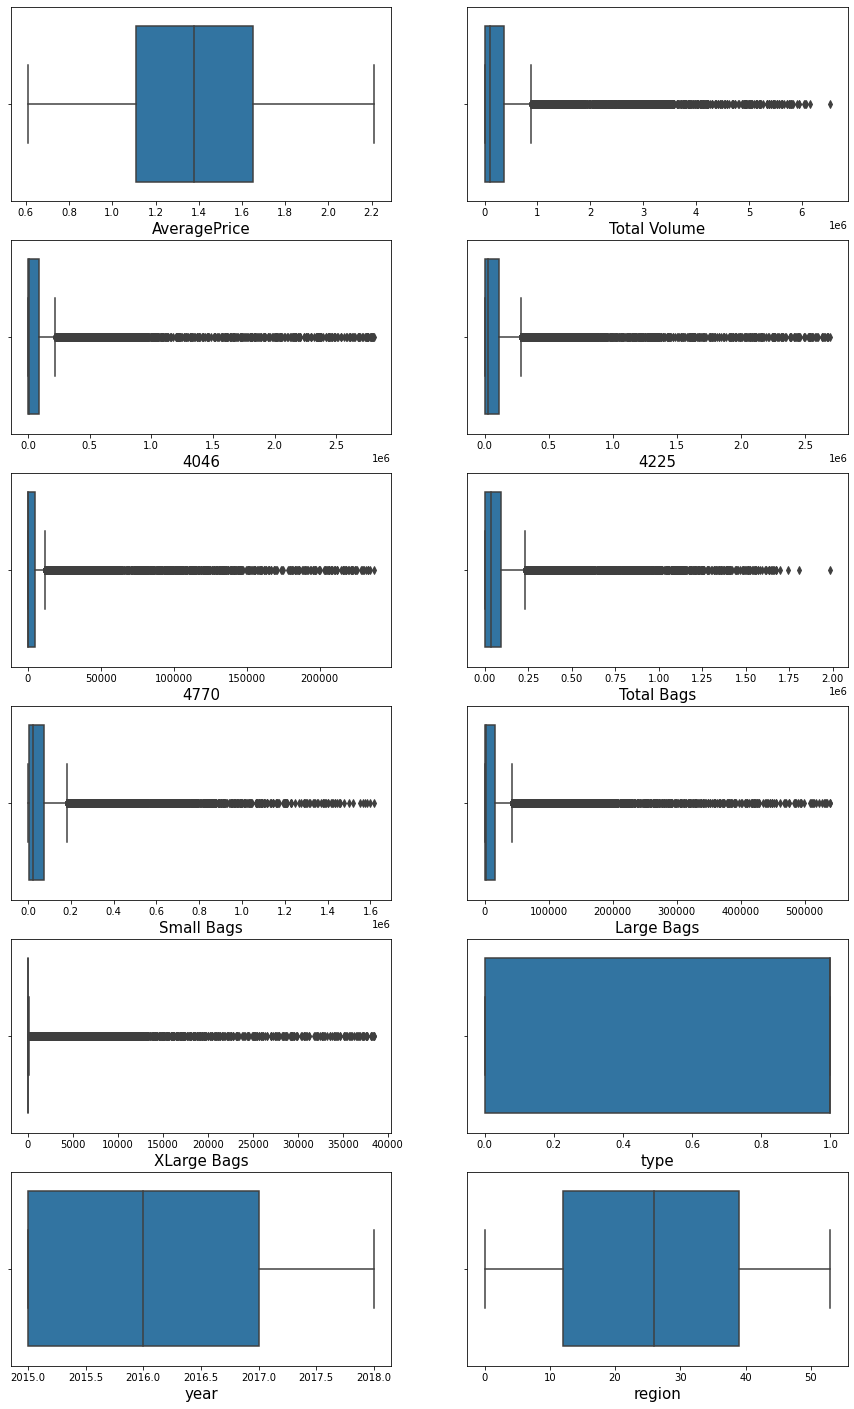

In [84]:
# checking of outliers by boxplot
plt.figure(figsize=(15,25))
graph=1
for column in data:
    if graph<=12:
        ax=plt.subplot(6,2,graph)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [20]:
data.shape

(18249, 12)

In [88]:
# removing of outlier using iqr method
Q1=data['AveragePrice'].quantile(.25)
Q3=data['AveragePrice'].quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [90]:
data['AveragePrice']=np.where(data['AveragePrice']>upper_limit,upper_limit,
                              np.where(data['AveragePrice']<lower_limit,
                                       lower_limit,
                              data['AveragePrice'])
                             )                            

In [ ]:
data['Total Volume']=np.where(data['Total Volume']>upper_limit,upper_limit,
                              np.where(data['Total Volume']<lower_limit,
                                       lower_limit,
                              data['Total Volume'])
                             )

In [93]:
data['4046']=np.where(data['4046']>upper_limit,upper_limit,
                              np.where(data['4046']<lower_limit,
                                       lower_limit,
                              data['4046'])
                             )

In [95]:
data['4225']=np.where(data['4225']>upper_limit,upper_limit,
                              np.where(data['4225']<lower_limit,
                                       lower_limit,
                              data['4225'])
                             )

In [98]:
data['4770']=np.where(data['4770']>upper_limit,upper_limit,
                              np.where(data['4770']<lower_limit,
                                       lower_limit,
                              data['4770'])
                             )

In [101]:
data['Total Bags']=np.where(data['Total Bags']>upper_limit,upper_limit,
                              np.where(data['Total Bags']<lower_limit,
                                       lower_limit,
                              data['Total Bags'])
                             )

In [102]:
data['Small Bags']=np.where(data['Small Bags']>upper_limit,upper_limit,
                              np.where(data['Small Bags']<lower_limit,
                                       lower_limit,
                              data['Small Bags'])
                             )

In [103]:
data['Large Bags']=np.where(data['Large Bags']>upper_limit,upper_limit,
                              np.where(data['Large Bags']<lower_limit,
                                       lower_limit,
                              data['Large Bags'])
                             )

In [104]:
data['XLarge Bags']=np.where(data['XLarge Bags']>upper_limit,upper_limit,
                              np.where(data['XLarge Bags']<lower_limit,
                                       lower_limit,
                              data['XLarge Bags'])
                             )

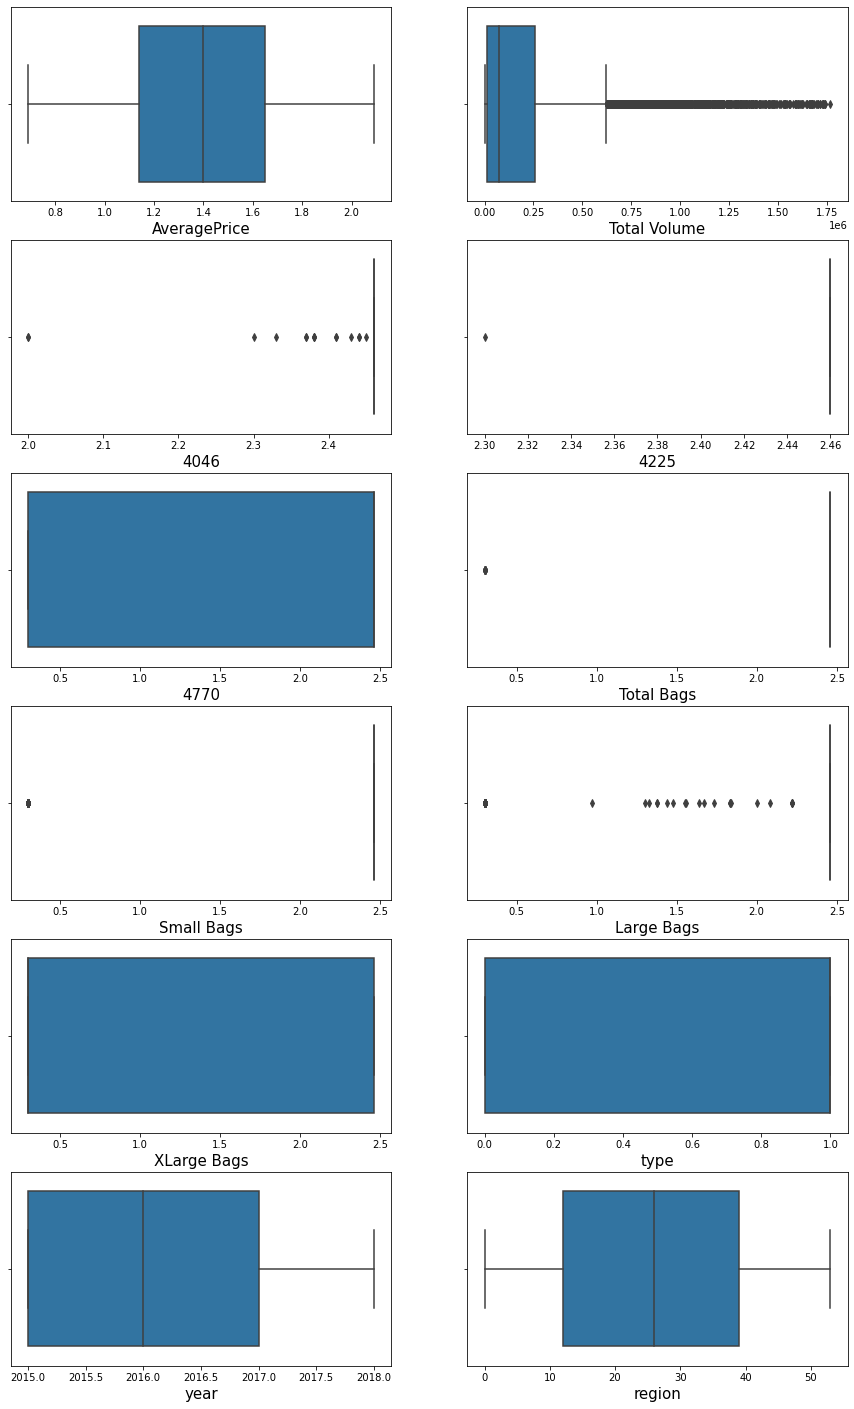

In [105]:
plt.figure(figsize=(15,25))
graph=1
for column in data:
    if graph<=12:
        ax=plt.subplot(6,2,graph)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [107]:
data.shape

(14056, 12)

In [108]:
# training of model
from sklearn.model_selection import train_test_split

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=55)

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
lr=LinearRegression()

In [112]:
lr.fit(x_train,y_train)

LinearRegression()

In [113]:
lr_pred=lr.predict(x_test)

In [114]:
# evaluating of metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [115]:
import statsmodels.api as sm

In [116]:
mean_absolute_error(y_test,lr_pred)

0.23657046920589606

In [117]:
mean_squared_error(y_test,lr_pred)

0.09434228450151638

In [118]:
r2_score(y_test,lr_pred)

0.41089245116697715

In [119]:
# finding of cross validation score
from sklearn.model_selection import cross_val_score

In [120]:
lin_score=cross_val_score(lr,x,y,cv=5,scoring='neg_mean_absolute_error')
lr_score_n=-lin_score
np.mean(lr_score_n)

0.2946190522057816

In [121]:
lin_score=cross_val_score(lr,x,y,cv=5,scoring='neg_mean_squared_error')
lr_score_n=-lin_score
np.mean(lr_score_n)

1.4710164050289631

In [122]:
lin_score=cross_val_score(lr,x,y,cv=5,scoring='r2')
lr_score_n=-lin_score
np.mean(lr_score_n)

8.292968072510423

In [123]:
from sklearn.neighbors import KNeighborsRegressor

In [124]:
knn=KNeighborsRegressor()

In [125]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [126]:
knn_pred=knn.predict(x_test)

In [127]:
mean_absolute_error(y_test,knn_pred)

0.10705278538812786

In [128]:
mean_squared_error(y_test,knn_pred)

0.023970978630136985

In [129]:
r2_score(y_test,knn_pred)

0.8503164881098274

In [130]:
lin_score=cross_val_score(knn,x,y,cv=5,scoring='neg_mean_absolute_error')
knn_score_n=-lin_score
np.mean(knn_score_n)

0.24192246417671198

In [131]:
lin_score=cross_val_score(knn,x,y,cv=5,scoring='neg_mean_squared_error')
knn_score_n=-lin_score
np.mean(knn_score_n)

0.10206998974992584

In [132]:
lin_score=cross_val_score(knn,x,y,cv=5,scoring='r2')
knn_score_n=-lin_score
np.mean(knn_score_n)

-0.05246174869898164

In [133]:
from sklearn.tree import DecisionTreeRegressor

In [134]:
dt=DecisionTreeRegressor()

In [135]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [136]:
dt_pred=dt.predict(x_test)

In [137]:
mean_absolute_error(y_test,dt_pred)

0.14936621004566208

In [138]:
mean_squared_error(y_test,dt_pred)

0.051637004566210044

In [139]:
r2_score(y_test,dt_pred)

0.6775597564781181

In [140]:
lin_score=cross_val_score(dt,x,y,cv=5,scoring='neg_mean_absolute_error')
dt_score_n=-lin_score
np.mean(dt_score_n)

0.28861806597416445

In [141]:
lin_score=cross_val_score(dt,x,y,cv=5,scoring='neg_mean_squared_error')
dt_score_n=-lin_score
np.mean(dt_score_n)

0.14756575162570343

In [142]:
lin_score=cross_val_score(dt,x,y,cv=5,scoring='r2')
dt_score_n=-lin_score
np.mean(dt_score_n)

0.46898227278797255

In [143]:
from sklearn.ensemble import RandomForestRegressor

In [144]:
rf=RandomForestRegressor()

In [145]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [146]:
rf_pred=rf.predict(x_test)

In [147]:
mean_absolute_error(y_test,rf_pred)

0.11120774429223744

In [148]:
mean_squared_error(y_test,rf_pred)

0.026173586429223752

In [149]:
r2_score(y_test,rf_pred)

0.8365626036409851

In [150]:
lin_score=cross_val_score(rf,x,y,cv=5,scoring='neg_mean_absolute_error')
rf_score_n=-lin_score
np.mean(rf_score_n)

0.21502415604950875

In [151]:
lin_score=cross_val_score(rf,x,y,cv=5,scoring='neg_mean_squared_error')
rf_score_n=-lin_score
np.mean(rf_score_n)

0.08424574206672739

In [152]:
lin_score=cross_val_score(rf,x,y,cv=5,scoring='r2')
rf_score_n=-lin_score
np.mean(rf_score_n)

-0.2326055264955306

In [153]:
# hyper parameter tunnung using GridSearchcv
grid_param={
    'max_depth':range(3,12,2),
        'min_samples_leaf':range(3,10,2),
            'min_samples_split':range(4,10,2)}

In [154]:
grid_search=GridSearchCV(estimator=dt,
                        param_grid=grid_param,
                        cv=5,
                        n_jobs=-1)

In [155]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)})

In [156]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'max_depth': 11, 'min_samples_leaf': 7, 'min_samples_split': 8}


In [157]:
dt=DecisionTreeRegressor(max_depth=15, min_samples_leaf=4, min_samples_split=15)
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.7213638238456503

In [ ]:
# from the above metrics evaluation it came to conclusion that only r2 metrics has only score greater than cross validation score
# therefore, decision tree is the best algorithm